# Objective- Implement SGD to Linear Regression

About the dataset-
--------------------

Boston House Prices dataset
---------------------------

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [78]:
# loading boston datasets
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()

In [79]:
# spliting the data into train and test

pd_boston=pd.DataFrame(data=boston.data)
price=boston.target
train_data, test_data, train_y, test_y=train_test_split(pd_boston, price, test_size=0.33, random_state=5)

In [80]:
# applying column standardization on train and test data

s=StandardScaler()
train_data=s.fit_transform(np.array(train_data))
test_data=s.transform(np.array(test_data))


In [81]:
#preparing training data for manual sgd regressor
manual_train=pd.DataFrame(data=train_data)
manual_train['price']=train_y


In [82]:
manual_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5


In [83]:
# converting to numpy array, which will be available for both SGDRegressor of sklearn and manual sgd regressor
test_data=np.array(test_data)
test_y=np.array(test_y)

In [84]:
results=pd.DataFrame(columns=['sno', 'algo', 'alpha', 'lr_rate_variation', 'init_lr_rate', 'power_t', 'n_iter', 'error'])

#  Experiment-1 ----SGDRegressor vs manual sgd
* fixing initial learning rate to 0.01, and making it constant and changing number of iteration


In [85]:
b_diff=[]
w_num=[]

In [86]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
#the functioning of this function is to use sklearn SGDRegressor and predict the price
#this function takes alpha, learning rate variation , initial learning rate(eta0), number of iteration , power_t, and all test and train data as an argument
#this function returns weight, intercept and mean squared error
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, train_data=train_data, test_data=test_data, train_y=train_y, test_y=test_y):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(train_data, train_y)
    y_pred=clf.predict(test_data)
    
    #scatter plot
    plt.scatter(test_y,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    #kdeplot
    
       
    sgd_error=mean_squared_error(test_y,y_pred)
    print('mean sq error=', sgd_error)
    print('number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error
    


### 1.1 SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

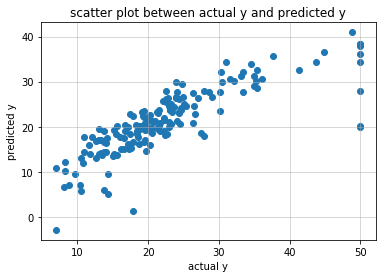

***********************************************************
mean sq error= 32.4694319228102
number of iteration= 1


In [88]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1)

In [89]:
new=[1, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1, error_sgd]
results.loc[0]=new

### 1.2 manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

In [90]:
# this function is a simple implementation of sgd to linear regression, here we didn't use any regularization
# we need to provide the pandas data with price, initial learning rate , and learning rate variation, number of iteration
# here we have implemented constant learning rate and invscaling learning rate
# checking the significant difference in loss i.e stopping condition might take lots of time so here we fix the number of loop 
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=10
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_y,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    
    
       
    manual_error=mean_squared_error(test_y,y_pred)
    print('error=',manual_error)
    
    return manual_error


In [91]:

w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1)

In [92]:
y_pred=pred(test_data, w=w, b=b)

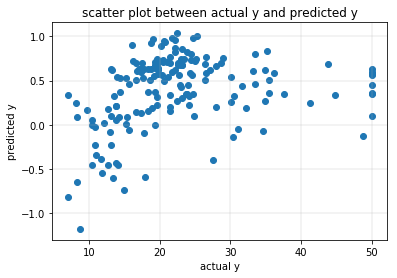

**************************************************************
error= 581.624165381566


In [93]:
manual_error=plot_(test_data,y_pred)

In [94]:
new=[2, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1, manual_error]
results.loc[1]=new

In [95]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.77008046  0.42065046 -0.25558241 -0.24505272 -0.66806225  2.91767122
 -0.36144425 -2.17215701  0.76521321 -0.58565128 -2.26093013  0.66030604
 -3.02096064]
*********************************************************************************
manual sgd weight---
 [[-0.08355681 -0.08929878  0.03343449  0.06242365 -0.03662863 -0.1098788
  -0.11197472 -0.04678205 -0.06058561 -0.11706459  0.14065918  0.15133454
  -0.11639935]]


In [96]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 13


In [97]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [21.75070444]
manual sgd intercept= [0.4254]


### 1.3 SGDRegressor, n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

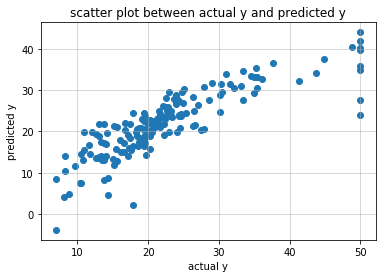

***********************************************************
mean sq error= 26.421014310724512
number of iteration= 100


In [98]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

In [99]:
new=[3, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 100, error_sgd]
results.loc[2]=new

### 1.4 manual sgd, n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

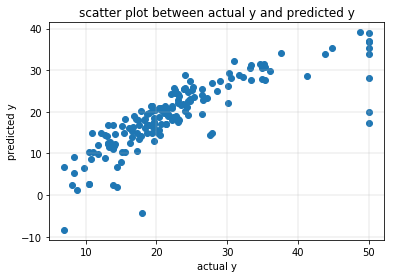

**************************************************************
error= 40.9308974983889


In [100]:

w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [101]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.1371407   0.99874755  0.14161615  0.82448679 -1.40394899  2.80182323
 -0.33442715 -2.83317463  3.18843639 -1.92079597 -1.94073416  1.06314335
 -3.28030336]
*********************************************************************************
manual sgd weight---
 [[-0.89886694  0.29481971 -1.19493164  0.37709722 -0.18391089  3.02874083
  -0.64268846 -2.17634777  0.49062769 -0.45743251 -1.63743473  1.11168167
  -3.19637659]]


In [102]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 8


In [103]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.63004335]
manual sgd intercept= [19.81853613]


In [104]:
new=[4, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 100, manual_error]
results.loc[3]=new

### 1.5 SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

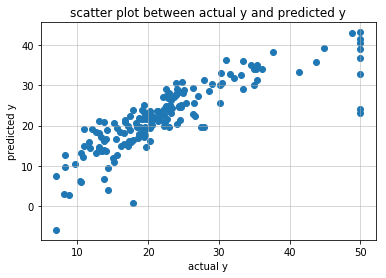

***********************************************************
mean sq error= 27.937633160007227
number of iteration= 1000


In [105]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

In [106]:
new=[5, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1000, error_sgd]
results.loc[4]=new

### 1.6 manual sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

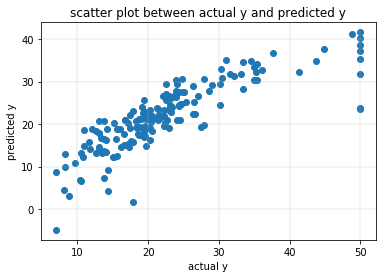

**************************************************************
error= 28.715571769031584


In [107]:

w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [108]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.34537691  0.8897758  -0.1886713   0.183283   -1.3000193   2.9597542
 -0.22311329 -2.87684979  3.04540382 -2.22196887 -2.19830817  0.99274593
 -3.39516832]
*********************************************************************************
manual sgd weight---
 [[-1.32145342  0.84111238 -0.50082887  0.09970994 -1.36476836  2.56922172
  -0.37830626 -2.87731518  2.46793651 -1.22291347 -2.26022257  0.9423407
  -3.35226073]]


In [109]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 4


In [110]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.88083494]
manual sgd intercept= [22.53417493]


In [111]:
new=[6, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1000, manual_error]
results.loc[5]=new

### 1.7 SGDRegressor, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

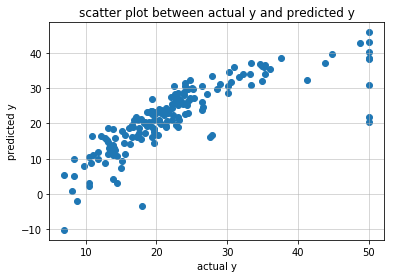

***********************************************************
mean sq error= 33.450943163385986
number of iteration= 10000


In [112]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)

In [113]:
new=[7, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 10000, error_sgd]
results.loc[6]=new

### 1.8 manual sgd, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

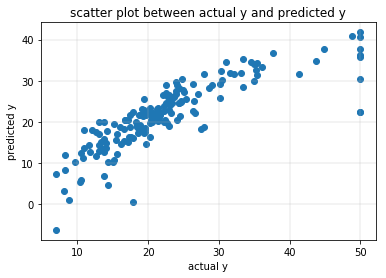

**************************************************************
error= 29.756766863714148


In [114]:

w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=10000)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [115]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.36094479  0.89764471 -0.39733237  0.31477308 -1.65340069  2.96797705
 -0.39234886 -2.54215416  2.5585151  -2.67070389 -2.05238445  1.42629492
 -3.37907957]
*********************************************************************************
manual sgd weight---
 [[-1.37796125  0.96283919 -0.15591904  0.02522011 -1.55036088  2.65693101
  -0.37272644 -2.8043049   2.90950702 -2.28167746 -2.04179418  1.13504042
  -3.15273839]]


In [116]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 2


In [117]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.68195516]
manual sgd intercept= [22.33865171]


In [118]:
new=[8, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 10000, manual_error]
results.loc[7]=new

In [119]:
import tabulate
table1 = [['n_iter', 'no. of points>30% in w', 'difference in intercept'],
         [1,w_num[0], b_diff[0]], 
         [100, w_num[1], b_diff[1]],
         [1000, w_num[2], b_diff[2]],
         [10000, w_num[3], b_diff[3]]]


In [120]:
print(tabulate.tabulate(table1, tablefmt='fancy_grid'))

╒════════╤════════════════════════╤═════════════════════════╕
│ n_iter │ no. of points>30% in w │ difference in intercept │
├────────┼────────────────────────┼─────────────────────────┤
│ 1      │ 13                     │ [21.32530444]           │
├────────┼────────────────────────┼─────────────────────────┤
│ 100    │ 8                      │ [2.81150721]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 1000   │ 4                      │ [0.34666002]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 10000  │ 2                      │ [0.34330345]            │
╘════════╧════════════════════════╧═════════════════════════╛


In [121]:
results

,sno,algo,alpha,lr_rate_variation,init_lr_rate,power_t,n_iter,error
0,1,SGDRegressor,0.0001,constant,0.01,0.25,1,32.469432
1,2,manual sgd,0.0001,constant,0.01,0.25,1,581.624165
2,3,SGDRegressor,0.0001,constant,0.01,0.25,100,26.421014
3,4,manual sgd,0.0001,constant,0.01,0.25,100,40.930897
4,5,SGDRegressor,0.0001,constant,0.01,0.25,1000,27.937633
5,6,manual sgd,0.0001,constant,0.01,0.25,1000,28.715572
6,7,SGDRegressor,0.0001,constant,0.01,0.25,10000,33.450943
7,8,manual sgd,0.0001,constant,0.01,0.25,10000,29.756767


## Observation-
* we have fixed learning rate and lr_rate_variation, and only changing n_iter
* as we can see , by increasing manual sgd n_iter , error reducing.
* with increase in iteration the number of element manual sgd weight and SGDRegressor weight is going to be more similar
* with increasing the iteration number the intercept value also coming closer

# Experiment 2-- using 'optimal' learning rate
* using optimal learning rate variation and changing the n_iter

In [122]:
b1_diff=[]
w1_num=[]

### 2.1 SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

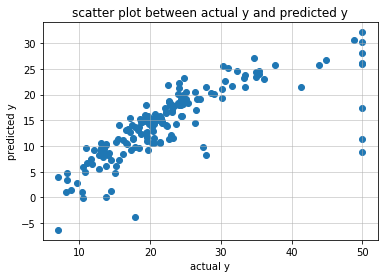

***********************************************************
mean sq error= 101.58053374738331
number of iteration= 1


In [123]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=1)

In [124]:
new=[9, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1, error_sgd]
results.loc[8]=new

### 2.2 manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

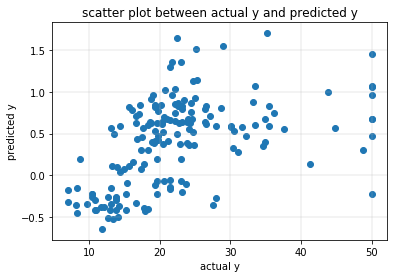

**************************************************************
error= 578.8764857796865


In [125]:

w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=1)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [126]:
new=[10, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 1, manual_error]
results.loc[9]=new

In [127]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.46854321  0.4724331  -0.6496289   0.16486177 -0.21711983  2.65847285
 -0.49965287 -0.83211868 -0.06008395 -0.85214502 -1.6239637   0.62380042
 -1.84834241]
*********************************************************************************
manual sgd weight---
 [[ 0.09207488 -0.14637757 -0.09939261  0.22252834 -0.06329277 -0.01724493
  -0.12158593  0.0213669  -0.13893235 -0.18303903  0.05256919  0.03641551
  -0.05460941]]


In [128]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w1_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 12


In [129]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b1_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [14.80617437]
manual sgd intercept= [0.4158]


### 2.3 SGDRegressor, n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

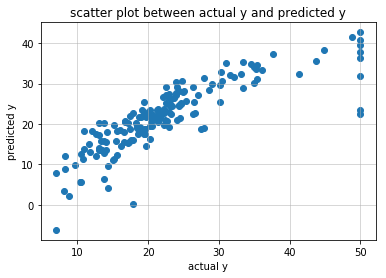

***********************************************************
mean sq error= 28.520739561292004
number of iteration= 100


In [130]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=100)

In [131]:
new=[11, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 100, error_sgd]
results.loc[10]=new

### 2.4 manual sgd, n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

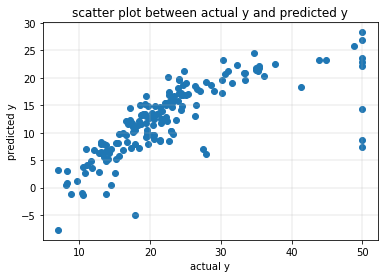

**************************************************************
error= 141.29104924426753


In [132]:

w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=100)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [133]:
new=[12, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 100, manual_error]
results.loc[11]=new

In [134]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.28894266  0.83378893 -0.27388982  0.19259325 -1.48220185  2.818715
 -0.35469951 -2.78418868  2.62774407 -1.87686818 -2.1187219   1.05589147
 -3.32980906]
*********************************************************************************
manual sgd weight---
 [[-0.47336964  0.27569868 -0.66478012  0.07329669 -0.70365531  2.17159412
  -0.45335688 -0.49509334 -0.27766142 -0.54942043 -1.43280873  0.72796356
  -1.77741166]]


In [135]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w1_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 11


In [136]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b1_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.54763312]
manual sgd intercept= [12.82409838]


### 2.5 SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

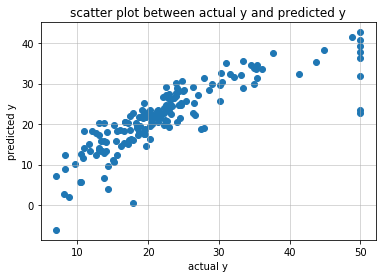

***********************************************************
mean sq error= 28.486745880890606
number of iteration= 1000


In [137]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=1000)

In [138]:
new=[13, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1000, error_sgd]
results.loc[12]=new

### 2.6 manual sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

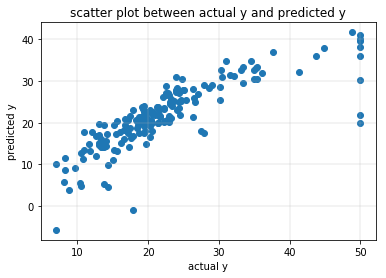

**************************************************************
error= 30.341260603855936


In [139]:

w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=1000)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [140]:
new=[14, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 1000, manual_error]
results.loc[13]=new

In [141]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.30942253  0.8574275  -0.16241595  0.18699791 -1.48256772  2.77786572
 -0.31772189 -2.77676449  2.98086019 -2.26890425 -2.13146151  1.05516787
 -3.32856774]
*********************************************************************************
manual sgd weight---
 [[-1.00402039  0.34507519 -0.63875838  0.18570054 -0.60304093  3.14183048
  -0.37921798 -1.9099759   0.75611146 -0.47484811 -1.93973178  0.97591047
  -3.12890969]]


In [142]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w1_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 7


In [143]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b1_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.53830622]
manual sgd intercept= [22.34256084]


### 2.7 SGDRegressor, n_iter=10000, lr_rate=0.01, lr_rate_variation='invscaling'

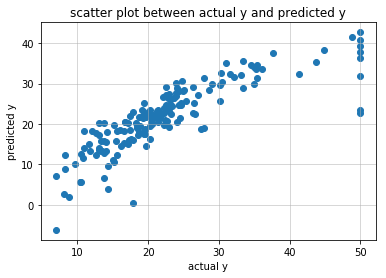

***********************************************************
mean sq error= 28.49430793794667
number of iteration= 10000


In [144]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=10000)

In [145]:
new=[15, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 10000, error_sgd]
results.loc[14]=new

### 2.8 manual sgd, n_iter=10000, lr_rate=0.01, lr_rate_variation='invscaling'

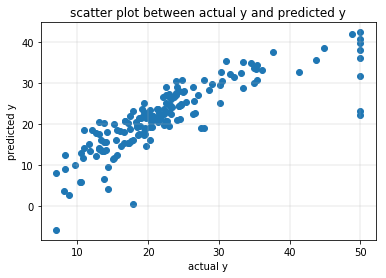

**************************************************************
error= 28.406428232673615


In [146]:

w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=10000)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [147]:
new=[16, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 10000, manual_error]
results.loc[15]=new

In [148]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.31056959  0.85903795 -0.16178747  0.18803679 -1.48263168  2.78621625
 -0.32223626 -2.77652255  2.98167093 -2.26832894 -2.12989636  1.05575739
 -3.33035346]
*********************************************************************************
manual sgd weight---
 [[-1.2288143   0.77118322 -0.31242219  0.16356881 -1.39009861  2.8989614
  -0.30770978 -2.74835738  2.45079942 -1.65732448 -2.16402752  1.05292411
  -3.26737259]]


In [149]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w1_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 2


In [150]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b1_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.53724582]
manual sgd intercept= [22.56382067]


In [151]:
results[8:]

,sno,algo,alpha,lr_rate_variation,init_lr_rate,power_t,n_iter,error
8,9,SGDRegressor,0.0001,invscaling,0.01,0.25,1,101.580534
9,10,manual sgd,0.0001,invscaling,0.01,0.25,1,578.876486
10,11,SGDRegressor,0.0001,invscaling,0.01,0.25,100,28.520740
11,12,manual sgd,0.0001,invscaling,0.01,0.25,100,141.291049
12,13,SGDRegressor,0.0001,invscaling,0.01,0.25,1000,28.486746
13,14,manual sgd,0.0001,invscaling,0.01,0.25,1000,30.341261
14,15,SGDRegressor,0.0001,invscaling,0.01,0.25,10000,28.494308
15,16,manual sgd,0.0001,invscaling,0.01,0.25,10000,28.406428


In [152]:
import tabulate
table2 = [['n_iter', 'no. of points>30% in w', 'difference in intercept'],
         [1,w1_num[0], b1_diff[0]], 
         [100, w1_num[1], b1_diff[1]],
         [1000, w1_num[2], b1_diff[2]],
         [10000, w1_num[3], b1_diff[3]]]
print(tabulate.tabulate(table2, tablefmt='fancy_grid'))


╒════════╤════════════════════════╤═════════════════════════╕
│ n_iter │ no. of points>30% in w │ difference in intercept │
├────────┼────────────────────────┼─────────────────────────┤
│ 1      │ 12                     │ [14.39037437]           │
├────────┼────────────────────────┼─────────────────────────┤
│ 100    │ 11                     │ [9.72353475]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 1000   │ 7                      │ [0.19574538]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 10000  │ 2                      │ [0.02657485]            │
╘════════╧════════════════════════╧═════════════════════════╛


### Observation-
* by increasing iteration number, weights of SGDRegressor and manual sgd becomes more similar
* with increasing in n_iter, the difference in intercepts of SGDRegressor and manual sgd becomes lesser

## Conclusion-
* we have taken boston house price dataset 
* we prepared the data for training and testing
* we used column standardization
* we have SGDRegressor and manual sgd regressor implemented here
* we didn't use any regularization term
* we have taken 'constant' and 'invscaling' learning rate variation in SGDRegressor and the same in manual sgd regressor
* in both 'constant' and 'invscaling' implementation we have seen that with higher number of iteration , manual sgd seems similar to SGDRegressor 
* in manual sgd regressor , error reduces with increasing in iteration number